In [40]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('NSE_data_all_stocks_2014.csv')

In [3]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-14,EGAD,Eaagads Ltd,8.2,14,23.75,23.75,23.75,23.75,NaN,NaN,"1,600",NaN
1,2-Jan-14,KUKZ,Kakuzi Plc,300,423.5,95,95,95,95,NaN,NaN,100,NaN
2,2-Jan-14,KAPC,Kapchorua Tea Kenya Plc,59,95,125,125,125,125,NaN,NaN,NaN,62.5
3,2-Jan-14,LIMT,Limuru Tea Plc,385,475,500,500,500,500,NaN,NaN,NaN,250.0
4,2-Jan-14,SASN,Sasini Plc,14.8,19,14.7,15,14.7,14.65,0.05,0.34%,"18,600",NaN


In [4]:
data.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
15690,31-Dec-14,SCOM,Safaricom Plc,23.5,33.5,14,14.15,14.05,14.1,-0.05,0.35%,"7,612,400",NaN
15691,31-Dec-14,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,213.51,219.66,215.49,217.76,-2.27,1.04%,NaN,NaN
15692,31-Dec-14,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,214.39,220.6,216.42,218.7,-2.28,1.04%,NaN,NaN
15693,31-Dec-14,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","5,112.65","5,112.65","5,112.65","5,091.60",21.05,0.41%,NaN,NaN
15694,31-Dec-14,^NASI,NSE All-Share Index,124.3,171.36,162.89,162.89,162.89,163.25,-0.36,0.22%,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15695 entries, 0 to 15694
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       15695 non-null  object 
 1   CODE       15695 non-null  object 
 2   NAME       15695 non-null  object 
 3   12m Low    15695 non-null  object 
 4   12m High   15695 non-null  object 
 5   Day Low    15695 non-null  object 
 6   Day High   15695 non-null  object 
 7   Day Price  15695 non-null  object 
 8   Previous   15695 non-null  object 
 9   Change     11020 non-null  object 
 10  Change%    11014 non-null  object 
 11  Volume     12738 non-null  object 
 12  Adjust     4040 non-null   float64
dtypes: float64(1), object(12)
memory usage: 1.6+ MB


In [6]:
#checking for missing values
data.isnull()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,False,False,False,False,False,False,False,False,False,True,True,False,True
1,False,False,False,False,False,False,False,False,False,True,True,False,True
2,False,False,False,False,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15690,False,False,False,False,False,False,False,False,False,False,False,False,True
15691,False,False,False,False,False,False,False,False,False,False,False,True,True
15692,False,False,False,False,False,False,False,False,False,False,False,True,True
15693,False,False,False,False,False,False,False,False,False,False,False,True,True


In [7]:
#checking for the total number of missing values
data.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         0
Change        4675
Change%       4681
Volume        2957
Adjust       11655
dtype: int64

In [8]:
#dropping the missing values
data.dropna(inplace = True)
data

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
6,2-Jan-14,CGEN,Car and General (K) Ltd,20,26,30,30.5,30.25,30,0.25,0.83%,"4,700",25.21
8,2-Jan-14,COOP,Co-operative Bank of Kenya Ltd,10.5,17,17.45,17.8,17.6,17.75,-0.15,0.85%,"231,300",12.57
9,2-Jan-14,DTK,Diamond Trust Bank Kenya Ltd,67,127,195,195,195,192,3,1.56%,"9,000",177.27
11,2-Jan-14,HFCK,HF Group Ltd,3.49,7.9,31.25,32,31.5,31.6,-0.1,0.32%,"12,200",28.64
14,2-Jan-14,NBK,National Bank of Kenya Ltd,3.4,4.33,28.5,28.5,28.5,28.75,-0.25,0.87%,"10,000",23.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15650,31-Dec-14,KQ,Kenya Airways Plc,0.8,5.5,8.35,8.9,8.7,8.55,0.15,1.75%,"134,500",34.80
15673,31-Dec-14,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,17,17.15,17.05,17.2,-0.15,0.87%,"88,100",4.26
15675,31-Dec-14,SLAM,Sanlam Kenya Plc,13,20,120,121,120,116,4,3.45%,"26,000",80.00
15681,31-Dec-14,NSE,Nairobi Securities Exchange Plc,7.04,13,19.5,21.25,20.65,20.15,0.5,2.48%,"137,900",15.49


In [9]:
data.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [10]:
data.columns

Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
      dtype='object')

In [11]:
data['NAME'].value_counts()

HF Group Ltd                          242
NCBA Group Plc                        215
Kenya Re-Insurance Corporation Ltd    211
Kenya Airways Plc                     207
Jubilee Holdings Ltd                  197
National Bank of Kenya Ltd            192
Sanlam Kenya Plc                      180
Diamond Trust Bank Kenya Ltd          179
Co-operative Bank of Kenya Ltd        178
I & M Holdings Plc                    175
Longhorn Publishers Plc               161
Crown Paints Kenya Plc                131
CIC Insurance Group Ltd               124
Williamson Tea Kenya Plc              118
Nairobi Securities Exchange Plc        72
Kapchorua Tea Kenya Plc                61
Flame Tree Group Holdings Ltd          30
Limuru Tea Plc                         28
Car and General (K) Ltd                23
Name: NAME, dtype: int64

Text(0, 0.5, 'Adjust')

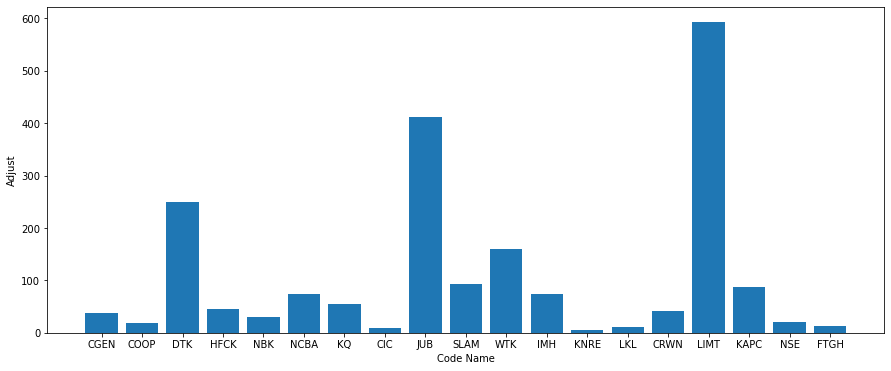

In [12]:
plt.figure(figsize = (15,6))
plt.bar(data['CODE'], data['Adjust'])
plt.xlabel('Code Name')
plt.ylabel('Adjust')

In [13]:
CODEColumnDummy = pd.get_dummies(data['CODE'])

In [14]:
df = pd.concat((data, CODEColumnDummy), axis = 1)

In [15]:
df.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,...,KAPC,KNRE,KQ,LIMT,LKL,NBK,NCBA,NSE,SLAM,WTK
6,2-Jan-14,CGEN,Car and General (K) Ltd,20,26,30,30.5,30.25,30,0.25,...,0,0,0,0,0,0,0,0,0,0
8,2-Jan-14,COOP,Co-operative Bank of Kenya Ltd,10.5,17,17.45,17.8,17.6,17.75,-0.15,...,0,0,0,0,0,0,0,0,0,0
9,2-Jan-14,DTK,Diamond Trust Bank Kenya Ltd,67,127,195,195,195,192,3,...,0,0,0,0,0,0,0,0,0,0
11,2-Jan-14,HFCK,HF Group Ltd,3.49,7.9,31.25,32,31.5,31.6,-0.1,...,0,0,0,0,0,0,0,0,0,0
14,2-Jan-14,NBK,National Bank of Kenya Ltd,3.4,4.33,28.5,28.5,28.5,28.75,-0.25,...,0,0,0,0,0,1,0,0,0,0


In [16]:
df = data.drop(['NAME'], axis = 1)
df.head()

,DATE,CODE,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
6,2-Jan-14,CGEN,20,26,30,30.5,30.25,30,0.25,0.83%,"4,700",25.21
8,2-Jan-14,COOP,10.5,17,17.45,17.8,17.6,17.75,-0.15,0.85%,"231,300",12.57
9,2-Jan-14,DTK,67,127,195,195,195,192,3,1.56%,"9,000",177.27
11,2-Jan-14,HFCK,3.49,7.9,31.25,32,31.5,31.6,-0.1,0.32%,"12,200",28.64
14,2-Jan-14,NBK,3.4,4.33,28.5,28.5,28.5,28.75,-0.25,0.87%,"10,000",23.55


In [17]:
x = df[['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust']]
y = df['CODE']

In [18]:
df.dtypes

DATE          object
CODE          object
12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change        object
Change%       object
Volume        object
Adjust       float64
dtype: object

In [19]:
df = df.astype({'DATE': 'str', 'CODE': 'str', '12m Low': 'str', '12m High': 'str', 'Day Low': 'str', 'Day High': 'str',
       'Day Price': 'str', 'Previous': 'str', 'Change': 'str', 'Change%': 'str', 'Volume': 'str', 'Adjust': 'str'})

In [20]:
df.dtypes

DATE         object
CODE         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object

In [43]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=5,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0, 0]]))

[1]


In [54]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
X = [['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust']]
y = ['CODE']
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

ValueError: could not convert string to float: '12m Low'